# **Tarea 4: Analizando un cubo de datos**

**Nombre:** Mariana Stone

**Curso:** Módulo Interdisciplinario: CD2201-16: Ciencia de Datos en Astronomía


# **Parte 1: Conocer archivo tipo 'cubo' y crear imagen White-light**

In [27]:
#Primero se debe "montar" el archivo a utilizar, para eso damos acceso nuestro drive
from google.colab import drive
drive.mount('/content/drive')

#Ahora registramos la ruta a nuestro archivo para poder leerlo y lo guardamos en la variable 'path_archivo'
path_archivo='/content/drive/MyDrive/CSWA31_MUSE_vacuum_zap.fits'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Importamos la librería a utilizar (en este caso astropy.io.fits)
import astropy.io.fits as F
cubo=F.open(path_archivo) # Cargamos el cubo de datos de nuestro archivo
cubo[0].header # Aquí mostramos el header de la primera extension de la variable cubo

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =           140.357084 / [deg] 09:21:25.7 RA (J2000) pointing           
DEC     =              18.1713 / [deg] 18:10:16.6 DEC (J2000) pointing          
EQUINOX =               2000.0 / Standard FK5                                   
EXPTIME =              13575.0 / Integration time                               
MJD-OBS =       58841.29679796 / Obs start                                      
DATE-OBS= '2019-12-24T07:07:

**Con esta información podemos recopilar algunos datos de interés:**

**Telescopio usado para tomar los datos:** ESO-VLT-U4

**Instrumento que lo hizo:** MUSE

**Nombre del objeto observado:** CSWA 31

**Valor de la variable 'EXPTIME':**  13.575. Este corresponde al tiempo que se necesitó para obtener los datos, es decir, el tiempo de exposición del instrumento que se necesitó para tomar todos los datos.


Ahora que ya conoce el telescopio y el instrumento que tomó los datos, investigue y responda las siguientes preguntas:

**¿De que tamaño es el diámetro del espejo del telescopio?**

Este telescopio consta de 4 telescopios unitarios con un espejo de 8,2 metros de diámetro y 4 telescopios auxiliares de 1,8 metros de diámetro.

**¿Cuán grande es el campo de visión que examina el instrumento (Field of view o FOV en inglés)?**

Este instrumento (MUSE) tiene dos modos:

El primer modo es el de campo amplio (WFM) con un fov de 1x1 arcmin^2.

El segundo es un modo de campo estrecho (NFM) con un fov de 7,5x7,5 arcsec^2

**¿Cuántos campos de visión del intrumento "caben" en la luna?.**

El tamaño de la luna visto desde la tierra es de aproximadamente 0.5 grados, lo que equivale a 30 arcmin (aprox), con esta información podemos inferir que caben ≈ 30 campos de visión en la luna.


**¿Qué rango de longitud de onda explora este instrumento?**

óptico, desde 465-930 nm

Explore la extensión asociada a los datos (índice = 1).

In [29]:
#Ahora mostraremos el header de la extensión asociada a los datos de la variable cubo (índice 1)
cubo[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  322                                                  
NAXIS2  =                  325                                                  
NAXIS3  =                 3682                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =      160.93047228529 / Pixel coordinate of reference point            
CRPIX2  =       162.3187381719 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

**¿En que unidades se encuentran los datos?**
Los datos se encuentran en las unidades 10^-20XAngstrom^(-1)Xcm^(-2)XergXs(-1)

In [30]:
# Guardamos los datos de esta extensión en la variable 'datos'
datos=cubo[1].data
# Mostramos las dimensiones de los datos
print(datos.shape)

(3682, 325, 322)


**Los numeros que vemos en la parte anterior corresponden a lo siguiente:**

Primer nº: 3682 elementos, dimensión espectral

Segundo nº: 325 elementos, dimensión espacial

Tercer nº: 322 elementos, dimensión espacial


# **White-light image y su visualización:**

Una white-light image es una imagén en la cual se sumó en la dirección espectral, es decir, sumamos todos los fotones que llegaron en todo el rango explorado, de ahí el origen del nombre.

En esta parte se creará un código capaz de calcular una white-light image (una línea con numpy).

In [31]:
# Importamos las librerías a utilizar
import numpy as np # Numpy para hacer los cáculos matemáticos
with_light_image=np.sum(datos,axis=0)
import matplotlib.pyplot as plt # Matplotlib para generar y visualizar tanto la imagen White-light como los gráficos

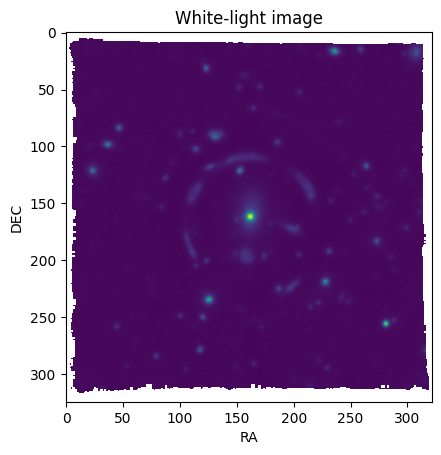

In [32]:
# Generamos la imagen white-light
plt.imshow(with_light_image)
plt.title('White-light image')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

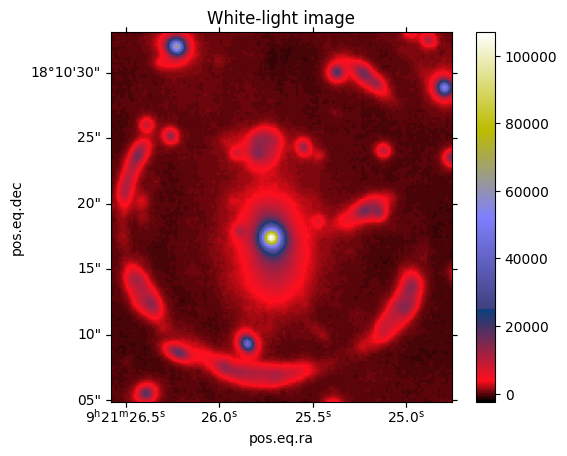

In [33]:
# Ahora vamos a modificar un poquito la visualización de la imagen para que se vea mas clara
# Para esto haremos lo siguiente:
from astropy.wcs import WCS # Importamos la librería astropy.wcs para añadir coordenadas a la visualización de la imagen
wcs=WCS(cubo[1].header)
wcs=wcs[0,:,:] # Aquí generamos las coordenadas
plt.subplot(projection=wcs) # Agregamos las coordenadas al plot
plt.imshow(with_light_image, cmap='gist_stern') # Generamos la imagen con un color map que deje distinguir bien los arcos circulares
plt.xlim(100,230) # Limitamos nuestro eje x para hacer una especie de 'zoom' a los arcos circulares
plt.ylim(99,240)  # Limitamos nuestro eje y para hacer una especie de 'zoom' a los arcos circulares
plt.title('White-light image')
plt.colorbar() # Agregamos una colorbar
plt.colormaps()
plt.show()

# **Parte 2: Creación de espectros**

Para lo que viene utilizaremos una librería creada para lidiar con cubos de datos. La instalaremos utilizando pip.

In [34]:
!pip install mpdaf

In [35]:
# Importamos las librerías a utilizar
from astropy.coordinates import SkyCoord
from astropy import units as u
import mpdaf as mpdaf

In [48]:
# Aquí se tiene una lista de 4 coordenadas extraídas de la Tabla 1 del artículo https://arxiv.org/pdf/2203.13759
# s0(a) =  9:21:25.040, 18:10:12.27    (RA, DEC)
# s0(b) =  9:21:25.858, 18:10:07.24    (RA, DEC)
# s0(c) =  9:21:26.439, 18:10:13.60    (RA, DEC)
# s0(d) =  9:21:25.781, 18:10:24.64    (RA, DEC)

# Creamos un objeto SkyCoord para cada una de las coordenadas anteriores
s0a=SkyCoord('9h21m25.040s', '18d10m12.27s', frame='icrs')
s0b=SkyCoord('9h21m25.858s', '18d10m07.24s', frame='icrs')
s0c=SkyCoord('9h21m26.439s', '18d10m13.60s', frame='icrs')
s0d=SkyCoord('9h21m25.781s', '18d10m24.64s', frame='icrs')

# Esto mostrará las coordenadas en grados de la primera coordenada.
print('s0a = (RA, DEC) = ',s0a.ra.value,',' ,s0a.dec.value)

s0a = (RA, DEC) =  140.3543333333333 , 18.170075


Cargaremos el cubo con mpdaf y luego extraeremos espectros con aperturas circulares.

In [37]:
# Cargamos con mpdaf
cube = mpdaf.obj.Cube(path_archivo)

In [38]:
# Creamos los espectros utilizando un centro (dec,ra) y radio 1.
espectro_s0a = cube.aperture((s0a.dec.value,s0a.ra.value),1, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0b = cube.aperture((s0b.dec.value,s0b.ra.value),1, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0c = cube.aperture((s0c.dec.value,s0c.ra.value),1, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0d = cube.aperture((s0d.dec.value,s0d.ra.value),1, unit_center=u.deg, unit_radius=u.arcsec)

[INFO] 100 spaxels used
INFO:mpdaf.obj.data:100 spaxels used
[INFO] 100 spaxels used
INFO:mpdaf.obj.data:100 spaxels used
[INFO] 100 spaxels used
INFO:mpdaf.obj.data:100 spaxels used
[INFO] 100 spaxels used
INFO:mpdaf.obj.data:100 spaxels used


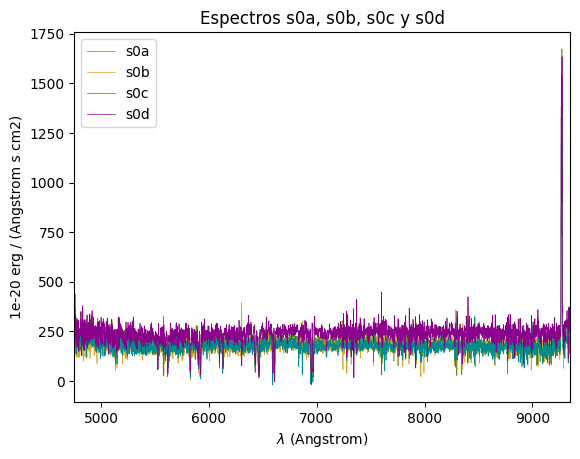

In [39]:
#Aquí graficamos los 4 espectros juntos
espectro_s0a.plot(label='s0a', linewidth=0.5, color='#6B8E23')
espectro_s0b.plot(label='s0b', linewidth=0.5, color='#DAA520')
espectro_s0c.plot(label='s0c', linewidth=0.5, color='#008B8B')
espectro_s0d.plot(label='s0d', linewidth=0.5, color='#8B008B')
plt.title('Espectros s0a, s0b, s0c y s0d')
plt.legend()
plt.show()

In [40]:
# Mostramos el espectro s0a
print(espectro_s0a)

<Spectrum(shape=(3682,), unit='1e-20 erg / (Angstrom s cm2)', dtype='float64')>


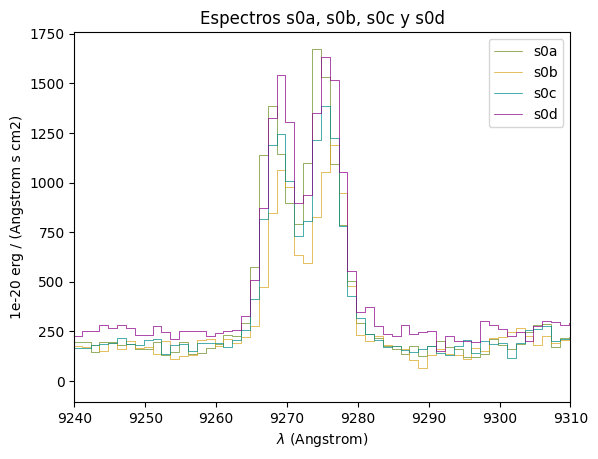

In [41]:
#Plot con rango de longitud de onda entre 9240-9310 Å.
espectro_s0a.plot(label='s0a', linewidth=0.5, color='#6B8E23')
espectro_s0b.plot(label='s0b', linewidth=0.5, color='#DAA520')
espectro_s0c.plot(label='s0c', linewidth=0.5, color='#008B8B')
espectro_s0d.plot(label='s0d', linewidth=0.5, color='#8B008B')
plt.title('Espectros s0a, s0b, s0c y s0d')
plt.xlim(9240, 9310)
plt.legend()
plt.show()

Notará que hay una emisión bastante clara con 2 máximos, uno detrás de otro. Esto es lo que se conoce como líneas espectrales de emisión de una galaxia. En particular, estas líneas parecen ser todas iguales entre los distintos espectros. Los autores del artículo antes mencionado afirman que estas 4 coordenadas provienen de una misma única fuente de fondo.

**¿Cómo justificaría dicha afirmación con el gráfico obtenido recién?**

Esto se puede confirmar dado que el gráfico nos muestra que el  comportamiento de las longitudes de onda de los cuatro espectros es muy similar. Todos tienen dos máximos locales consecutivos en un rango de longitud de onda de aproximadamente 9268 Å a 9280 Å. Por otra parte, observando el primer gráfico creado, podemos ver que el  comportamiento de las  λ son tan similares que se sobreponen unas con otras, sin lograr identificar bien cada uno de los espectros por separado.

# **Parte 3: Creación de modelos y cálculo de "redshift"**

Esta emisión proviene del gas de estas fuentes, en particular es una línea de OII, es decir, oxígeno que fue ionizado. Esta línea es lo que se conoce como un "doblete" (doublet en inglés), lo que quiere decir que en realidad son dos líneas, muy cercanas en longitud de onda. La longitud de onda medida en laboratorio de ambas líneas es 3727.092 Å y 3729.875 Å, respectivamente. Claramente las líneas que vemos en estas fuentes no están centradas en esas longitudes de onda.

El desplazamiento aparente de las longitudes de onda, con respecto a aquellas medidas en el laboratorio, es un efecto de la expansión del universo. La expansión genera que los fotones pasen a tener una longitud de onda cada vez más larga a medida que se alejan de un observador. Esto se suele definir con la cantidad "redshift" (z) definida por:


$$λ_{obs}=(1+z)λ_{0}$$

donde $λ_{obs}$ y $λ_{0}$ corresponde a la longitud de onda observada y aquella medida en el laboratorio. Vamos a determinar el redshift de esta fuente, para ello fitearemos un modelo que considera dos gaussianas (una para cada línea) y una constante, es decir nuestro modelo es de la forma:

$$f(λ,z,A_{1},σ_{1},A_{2},σ_{2},C)=A_{1}exp(-(λ(1+z)λ_{0,1})^{2}/(2σ_{1}^{2})) + A_{2}exp(-(λ(1+z)λ_{0,2})^{2}/(2σ_{2}^{2}))$$

Donde $λ_{0,1}= 3727.092$ Å y $λ_{0,2}= 3729.875$ Å.


**Usamos el método gauss_dfit para generar la gaussiana del espectro s0a**

**Describa los 3 primeros parámetros de dicha función:**
El primer parámetro corresponde al valor de longitud de onda mínimo, el segundo al valor de longitud de onda máximo y el tercero a la relación entre los dos centros gaussianos.

Text(0.5, 1.0, 'Gaussiana espectro s0a')

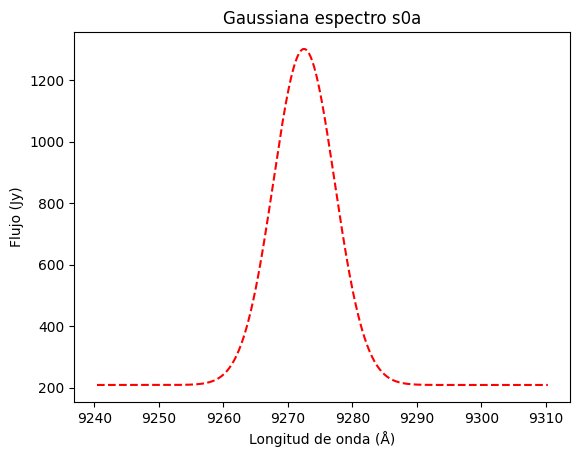

In [42]:
# Ahora usaremos el método gauss_dfit (solo utilizaremos el espectro s0a)
# Plot con rango de longitud de onda entre 9240-9310 Å.
fit1, fit2 = espectro_s0a.gauss_dfit(9240,9310,1.4869, plot=True)
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo (Jy)')
plt.title('Gaussiana espectro s0a')


In [43]:
# Mostramos los parámetros del primer objeto Gauss1D (fit1)
fit1.print_param()

[INFO] Gaussian center = 9272.5 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian center = 9272.5 (error:nan)
[INFO] Gaussian integrated flux = 12968.5 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 12968.5 (error:nan)
[INFO] Gaussian peak value = 1092.34 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian peak value = 1092.34 (error:nan)
[INFO] Gaussian fwhm = 11.1532 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 11.1532 (error:nan)
[INFO] Gaussian continuum = 208.692
INFO:mpdaf.obj.fitting:Gaussian continuum = 208.692


In [44]:
# Mostramos los parámetros del segundo objeto Gauss1D (fit2)
fit2.print_param()

[INFO] Gaussian center = 13787.3 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian center = 13787.3 (error:nan)
[INFO] Gaussian integrated flux = 8765.16 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 8765.16 (error:nan)
[INFO] Gaussian peak value = 738.294 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian peak value = 738.294 (error:nan)
[INFO] Gaussian fwhm = 11.1532 (error:nan)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 11.1532 (error:nan)
[INFO] Gaussian continuum = 208.692
INFO:mpdaf.obj.fitting:Gaussian continuum = 208.692


**Ahora creamos un modelo para generar el gráfico de la gaussiana de s0a y comparar con el método anterior**

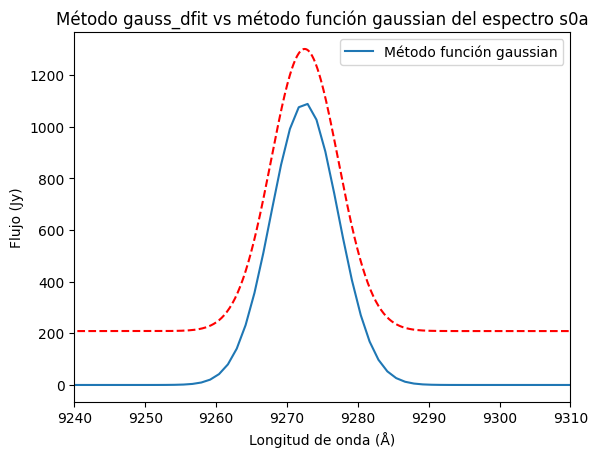

In [45]:
#Usamos una función 'ayuda' para hacer los calculos correspondientes a f(λ,𝑧,𝐴1,σ1,𝐴2,σ2,𝐶)
# Función de ayuda
def gaussian(x, center, fwhm, peak):
  sigma = fwhm/2.355
  dif = x - center
  return peak * np.exp(-(dif**2)/(2*sigma**2))
#Calculamos las gaussianas de fit1 y fit2
gauss1=gaussian(espectro_s0a.wave.coord(),9272.5,11.1532,1092.34)
gauss2=gaussian(espectro_s0a.wave.coord(),13787.3,11.1532,738.294)

#Generamos los gráficos correspondientes
plt.plot(espectro_s0a.wave.coord(), gauss1+gauss2, label='Método función gaussian') # Modelo hecho con función gaussian
fit1, fit2 = espectro_s0a.gauss_dfit(9240,9310,1.4869, plot=True)  # Método hecho con gauss_dfit
plt.xlim(9240, 9310) # Rango de longitud de onda que nos interesa graficar
plt.title('Método gauss_dfit vs método función gaussian del espectro s0a')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo (Jy)')
plt.legend()

Por último, debemos encontrar el redshift de la fuente. Para ello simplemente calcularemos el redshift (z) utilizando la definición provista, considerando que la longitud de onda observada corresponde al centro de la gaussiana de fit 1: λ𝑜𝑏𝑠= 9272.5

In [46]:
# Definimos las variables a utilizar
lambda_0 =  3727.092  # consideramos la línea de longitud de onda más corta
lambda_obs=9272.5 # centro de la gaussiana de fit 1
# Hacemos el cálculo de z
z=(lambda_obs/lambda_0)-1
# Mostramos el redshift
print('El redshift es: {:.3f}'.format(z))

El redshift es: 1.488
